In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
# Read the vine_table data
vine_df = pd.read_csv('vine_table.csv', low_memory = False)

In [3]:
vine_df.head(10)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R3P2HIOQCIN5ZU,1.0,0.0,0.0,N,Y
1,R12VVR0WH5Q24V,5.0,0.0,0.0,N,Y
2,RNCCKB6TV5EEF,4.0,0.0,0.0,N,Y
3,R2NZXYIVCGB13W,5.0,0.0,6.0,N,Y
4,R2EQ1TG9IT3OEQ,3.0,0.0,0.0,N,Y
5,R1WXA9JSC2H1U1,5.0,1.0,1.0,N,Y
6,R12ENYLFGGNWRV,5.0,1.0,1.0,N,Y
7,R2R07E5PNXEUO5,4.0,0.0,0.0,N,Y
8,R27BA52AKWMWN3,5.0,0.0,0.0,N,Y
9,RLF8DOID2KD5O,3.0,0.0,0.0,N,Y


In [4]:
# Select data with total votes >=20
vine_20_df = vine_df.loc[(vine_df["total_votes"] >= 20)]
vine_20_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
188,ROP6ITXO8K5V2,5.0,23.0,27.0,N,Y
406,R37F42INKX7L9K,5.0,45.0,49.0,N,Y
667,R3ND1LVU7AXCVF,1.0,21.0,21.0,N,Y
881,R2EHKYNEP8WVSR,5.0,25.0,25.0,N,Y
884,RXOS7BHID0UHL,5.0,16.0,27.0,N,N


#### (Helpful Votes)/(Total Votes) greater than 50%

In [5]:
vine_good_df = vine_20_df.loc[vine_20_df["helpful_votes"]/vine_20_df["total_votes"] >= 0.50]
vine_good_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
188,ROP6ITXO8K5V2,5.0,23.0,27.0,N,Y
406,R37F42INKX7L9K,5.0,45.0,49.0,N,Y
667,R3ND1LVU7AXCVF,1.0,21.0,21.0,N,Y
881,R2EHKYNEP8WVSR,5.0,25.0,25.0,N,Y
884,RXOS7BHID0UHL,5.0,16.0,27.0,N,N


#### Reviews written by people in the Vine program (paid)

In [6]:
vine_paid_df = vine_good_df.loc[(vine_good_df["vine"] == 'Y')]
vine_paid_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
984,R9I5FOLKU99RY,5.0,19.0,20.0,Y,N
1174,R3ED60RC69CCQ6,5.0,22.0,23.0,Y,N
1962,R2JM687C525WR9,3.0,33.0,33.0,Y,N
15133,RUB4AUWGHG16G,4.0,25.0,27.0,Y,N
41239,R1S3IDYJUA6V2G,5.0,28.0,32.0,Y,N


#### Reviews written by people not in the Vine program (unpaid)

In [7]:
vine_notpaid_df = vine_good_df.loc[(vine_good_df["vine"] == 'N')]
vine_notpaid_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
188,ROP6ITXO8K5V2,5.0,23.0,27.0,N,Y
406,R37F42INKX7L9K,5.0,45.0,49.0,N,Y
667,R3ND1LVU7AXCVF,1.0,21.0,21.0,N,Y
881,R2EHKYNEP8WVSR,5.0,25.0,25.0,N,Y
884,RXOS7BHID0UHL,5.0,16.0,27.0,N,N


#### Total number of reviews

In [8]:
total_rev = vine_df.count().star_rating
total_rev

9231159

In [9]:
# Just checking count()
total_rev = vine_df['star_rating'].count()
total_rev

9231159

#### Total number of 5 star reviews

In [10]:
# Five star ratings dataFrame
five_star_df = vine_df.loc[(vine_df["star_rating"] == 5)]

# Counts of total five start ratings
five_star= five_star_df.count().star_rating
five_star

5716852

#### % of 5 star reviews

In [11]:
five_star_percent = five_star/total_rev * 100
five_star_percent

61.92994834126462

#### % of 5 star reviews by the customers in Vine program (paid people)

In [12]:
# Paid count reviews
vine_Y_count = five_star_df.loc[(five_star_df["vine"] == 'Y')].count().star_rating
vine_Y_count

17533

In [13]:
# % of 5 star reviews by Vine program (paid) customer
vine_Y_percent = vine_Y_count/five_star * 100
vine_Y_percent

0.3066897656262572

#### % of 5 star reviews by customers NOT in Vine program (unpaid)

In [14]:
vine_N_count = five_star_df.loc[(five_star_df['vine'] == 'N')].count().star_rating
vine_N_count

5699319

In [15]:
# % of 5 star reviews by customers NOT in the Vine program
vine_N_percent = vine_N_count/five_star * 100
vine_N_percent

99.69331023437374

### Create a histogram (barplot) showing ratings given by paid and unpaid customers.

array([[<AxesSubplot:title={'center':'star_rating'}>]], dtype=object)

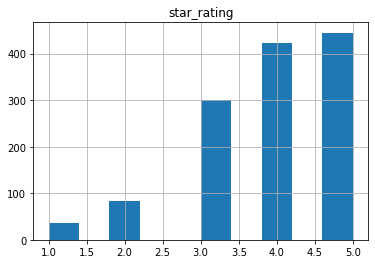

In [16]:
# plot vine member ratings histogram
vine_paid_df.hist(column='star_rating')

### PLOT: Paid Reviews Normalized to Relative Percentage

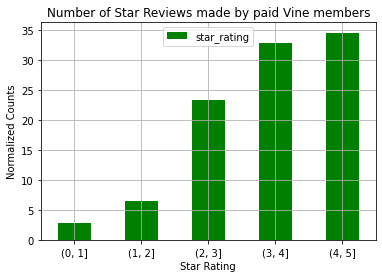

In [17]:
# Counts normalized in the y-axis
paid_v = pd.cut(vine_paid_df['star_rating'], bins=[0,1,2,3,4,5])
paid_norm = paid_v.value_counts(sort=False, normalize=True).mul(100)

ax = paid_norm.plot.bar(rot=0, color="green", figsize=(6,4))
plt.xlabel("Star Rating")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper center")
plt.title("Number of Star Reviews made by paid Vine members")
plt.grid(True)
# Save figure
plt.savefig("images/paid_count_plot.png")

plt.show()

### PLOT: Unpaid Reviews normalized to relative percentages

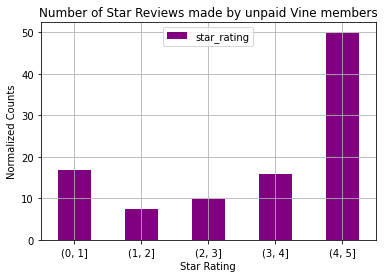

In [18]:
# Counts normalized in the y-axis
notpaid_v = pd.cut(vine_notpaid_df['star_rating'], bins=[0,1,2,3,4,5])
notpaid_norm = notpaid_v.value_counts(sort=False, normalize=True).mul(100)

ax = notpaid_norm.plot.bar(rot=0, color="purple", figsize=(6,4))
plt.xlabel("Star Rating")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper center")
plt.title("Number of Star Reviews made by unpaid Vine members")
plt.grid(True)
# Save figure
plt.savefig("images/unpaid_count_plot.png")

plt.show()